In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import load_dataset, plot_image
from lib.network import NeuralNetworkClassifier

from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
# Load data
X_train_orig, y_train, X_test_orig, y_test, classes = load_dataset()

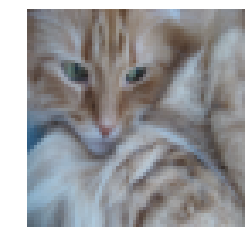

In [3]:
plot_image(X_train_orig, y_train, 2)

In [4]:
X_train_orig.shape

(209, 64, 64, 3)

In [5]:
y_train.shape

(209,)

In [6]:
n_samples_train = X_train_orig.shape[0]
n_samples_test = X_test_orig.shape[0]
X_train_flattern = X_train_orig.reshape(n_samples_train, -1)
X_test_flattern = X_test_orig.reshape(n_samples_test, -1)

In [7]:
X_train_flattern.shape

(209, 12288)

In [8]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train_flattern)
X_test = scale.transform(X_test_flattern)

/home/yang/.local/share/virtualenvs/deeplearning-nSLX-h4j/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yang/.local/share/virtualenvs/deeplearning-nSLX-h4j/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yang/.local/share/virtualenvs/deeplearning-nSLX-h4j/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
y_train.shape

(209,)

In [10]:
X_train

array([[-1.11031618e+00, -9.84118601e-01, -4.09532700e-01, ...,
        -1.20650618e+00, -1.34172793e+00, -1.05231410e+00],
       [ 1.34624769e+00,  1.30374977e+00,  1.30231398e+00, ...,
        -4.32373805e-02, -1.18650240e-01,  1.69455696e-01],
       [-2.18267844e-01, -4.15704099e-01, -2.56232997e-01, ...,
         7.51190095e-01,  8.13946499e-01,  1.08955394e+00],
       ...,
       [ 6.18885207e-01,  7.77966356e-01,  9.82939603e-01, ...,
        -6.78765786e-04,  2.94138481e-01,  1.19513898e+00],
       [-1.04169707e+00, -1.08359114e+00, -8.31106883e-01, ...,
        -1.14976136e+00, -1.26528558e+00, -1.05231410e+00],
       [-1.23383056e+00, -1.02674969e+00, -4.47857625e-01, ...,
        -1.20650618e+00, -1.34172793e+00, -1.05231410e+00]])

In [18]:
layers_dims = [12288, 100, 10, 5, 1]

In [19]:
nn = NeuralNetworkClassifier(layer_dims=layers_dims, max_iter=2500, learning_rate=0.006)

In [20]:
nn.fit(X_train, y_train)

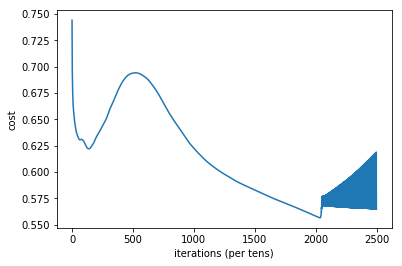

In [21]:
plt.plot(nn.costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [32]:
len(nn.costs)

2500

In [33]:
for i, cost in enumerate(nn.costs):
    if i % 100 == 0:
        print(cost)

0.6931485569594755
0.6748409855193971
0.663438673626415
0.6563063956758225
0.6518218026971722
0.6489873131240272
0.6471871852991674
0.6460391342071367
0.6453043167862476
0.6448325671259896
0.644528943897712
0.6443331229094525
0.6442066132470113
0.6441247671627063
0.6440717568833707
0.6440373912491684
0.6440150958444978
0.6440006220632254
0.6439912212766431
0.6439851134729035
0.6439811440424867
0.643978563357622
0.6439768853405416
0.6439757948766601
0.6439750866803007


In [34]:
accuracy = nn.get_accuracy(X_test, y_test)
accuracy

0.34